# Denoising Autoencoders

In [0]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [0]:
class EarlyStopping:
    """Early stops the training if validation loss doesn't improve after a given patience."""
    def __init__(self, patience=7, verbose=False, delta=0):
        """
        Args:
            patience (int): How long to wait after last time validation loss improved.
                            Default: 7
            verbose (bool): If True, prints a message for each validation loss improvement. 
                            Default: False
            delta (float): Minimum change in the monitored quantity to qualify as an improvement.
                            Default: 0
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta

    def __call__(self, val_loss, model):

        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Saves model when validation loss decrease.'''
        if self.verbose:
            print(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), 'checkpoint.pt')
        self.val_loss_min = val_loss

In [0]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Set Hyper-parameters (change None)
BATCH_SIZE = 128
LEARNING_RATE = 1e-3
N_EPOCH = 10000 # use early stopping trick
NOISE_FACTOR = 0.2

In [0]:
# MNIST Dataset
original_train_dataset = datasets.MNIST(root='./mnist_data/', train=True, transform=transforms.ToTensor(), download=True)
original_test_dataset = datasets.MNIST(root='./mnist_data/', train=False, transform=transforms.ToTensor(), download=False)

# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=original_train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=original_test_dataset, batch_size=BATCH_SIZE, shuffle=False)


In [0]:
class DAE(nn.Module):
    def __init__(self, x_dim, z_dim):
        super(DAE, self).__init__()
        
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 256),
            nn.ReLU(True),
            nn.Linear(256, 64),
            nn.ReLU(True))
        
        self.decoder = nn.Sequential(
            nn.Linear(64, 256),
            nn.ReLU(True),
            nn.Linear(256, 28 * 28),
            nn.Sigmoid())
    
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [0]:
def add_noise(images):
    noise = torch.randn(images.size())
    # add noise
    images_with_noise = NOISE_FACTOR * noise + images
    # Clip the images to be between 0 and 1
    images_with_noise = np.clip(images_with_noise, 0., 1.)
    return images_with_noise


In [0]:
# Create Model (change None)
latent_dim = 32
dae = DAE(x_dim=784, z_dim=latent_dim)

# Device setting
dae = dae.to(device)

In [0]:
# Your Model

In [0]:
optimizer = optim.Adam(dae.parameters(), lr=LEARNING_RATE)
criterion = nn.BCELoss() # Define loss function

Validation loss decreased (inf --> 0.086347).  Saving model ...
Inputs:


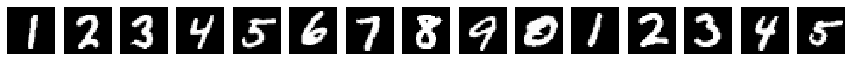

Inputs with Noise:


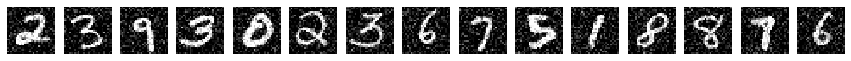

Reconstructions:


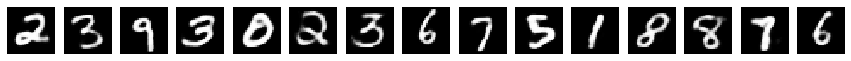

  Epoch 1/10000	 Loss: 0.00000139
EarlyStopping counter: 1 out of 7
Inputs:


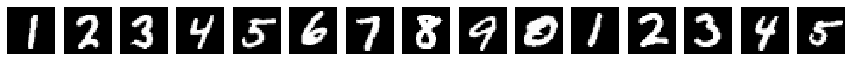

Inputs with Noise:


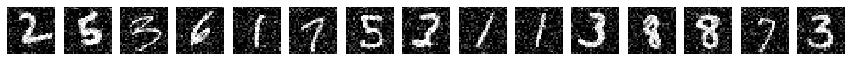

Reconstructions:


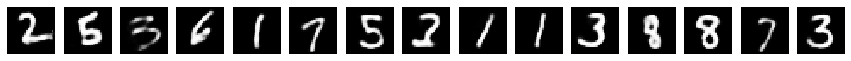

  Epoch 2/10000	 Loss: 0.00000138
Validation loss decreased (0.086347 --> 0.086235).  Saving model ...
Inputs:


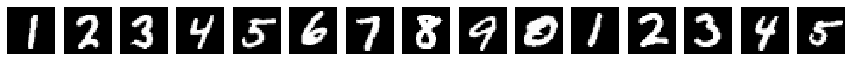

Inputs with Noise:


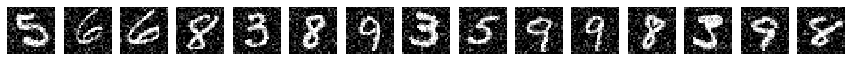

Reconstructions:


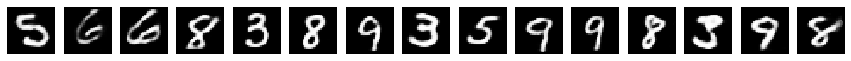

  Epoch 3/10000	 Loss: 0.00000138
Validation loss decreased (0.086235 --> 0.085422).  Saving model ...
Inputs:


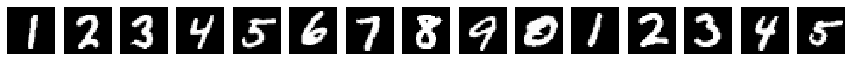

Inputs with Noise:


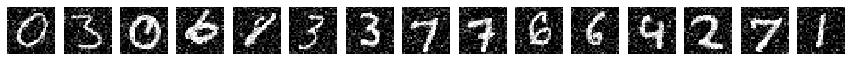

Reconstructions:


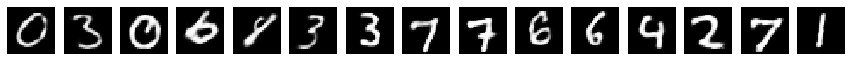

  Epoch 4/10000	 Loss: 0.00000137
EarlyStopping counter: 1 out of 7
Inputs:


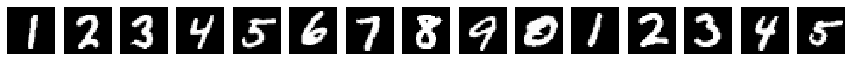

Inputs with Noise:


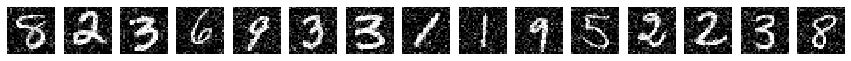

Reconstructions:


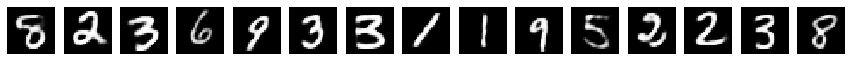

  Epoch 5/10000	 Loss: 0.00000137
EarlyStopping counter: 2 out of 7
Inputs:


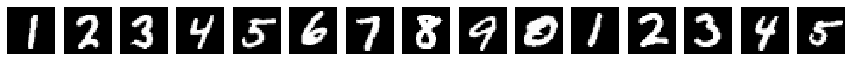

Inputs with Noise:


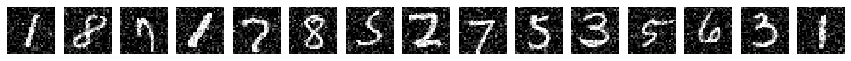

Reconstructions:


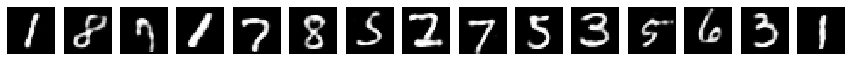

  Epoch 6/10000	 Loss: 0.00000137
Validation loss decreased (0.085422 --> 0.084932).  Saving model ...
Inputs:


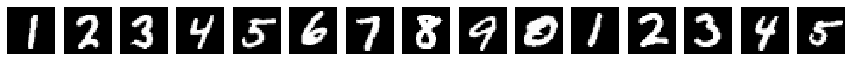

Inputs with Noise:


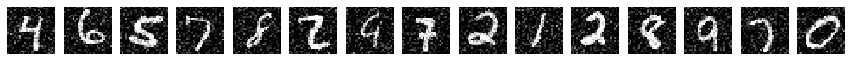

Reconstructions:


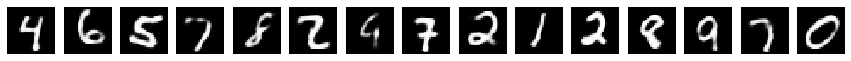

  Epoch 7/10000	 Loss: 0.00000137
EarlyStopping counter: 1 out of 7
Inputs:


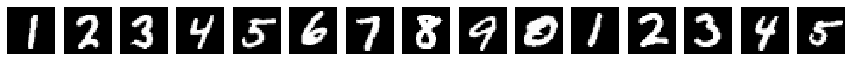

Inputs with Noise:


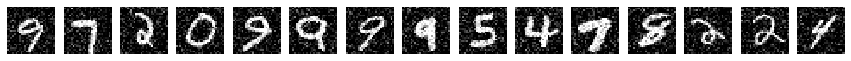

Reconstructions:


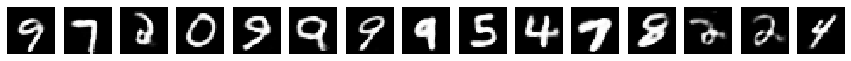

  Epoch 8/10000	 Loss: 0.00000136
Validation loss decreased (0.084932 --> 0.084064).  Saving model ...
Inputs:


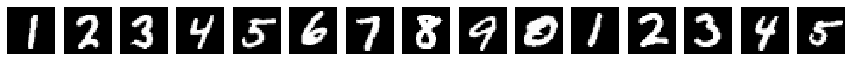

Inputs with Noise:


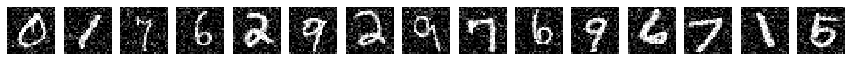

Reconstructions:


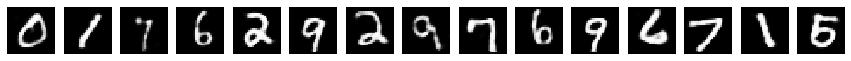

  Epoch 9/10000	 Loss: 0.00000136
EarlyStopping counter: 1 out of 7
Inputs:


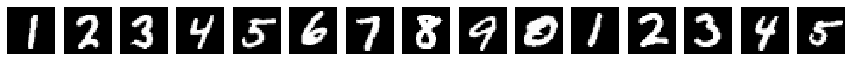

Inputs with Noise:


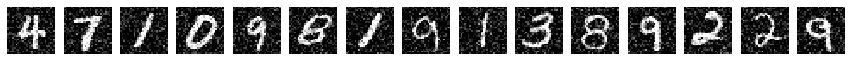

Reconstructions:


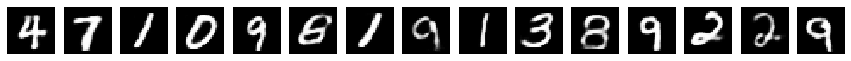

  Epoch 10/10000	 Loss: 0.00000136
Validation loss decreased (0.084064 --> 0.083959).  Saving model ...
Inputs:


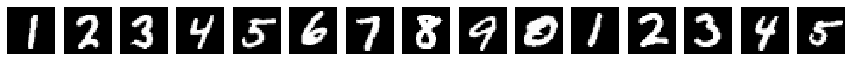

Inputs with Noise:


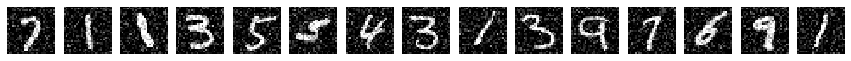

Reconstructions:


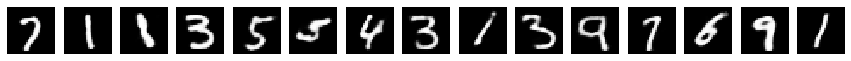

  Epoch 11/10000	 Loss: 0.00000136
EarlyStopping counter: 1 out of 7
Inputs:


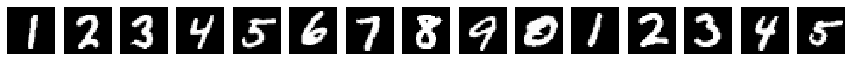

Inputs with Noise:


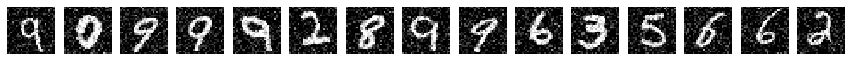

Reconstructions:


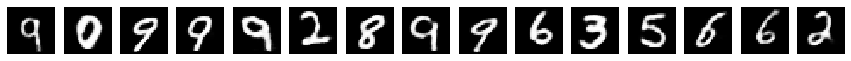

  Epoch 12/10000	 Loss: 0.00000135
Validation loss decreased (0.083959 --> 0.083872).  Saving model ...
Inputs:


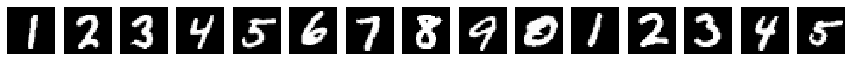

Inputs with Noise:


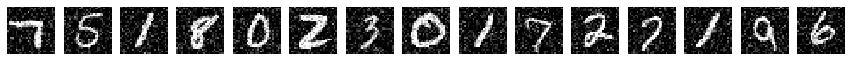

Reconstructions:


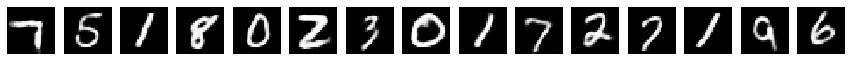

  Epoch 13/10000	 Loss: 0.00000135
EarlyStopping counter: 1 out of 7
Inputs:


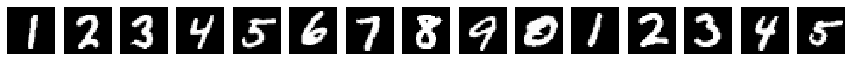

Inputs with Noise:


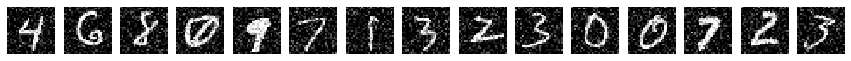

Reconstructions:


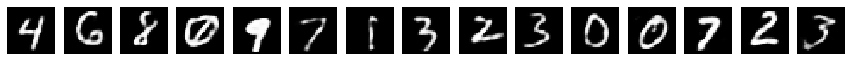

  Epoch 14/10000	 Loss: 0.00000135
Validation loss decreased (0.083872 --> 0.083667).  Saving model ...
Inputs:


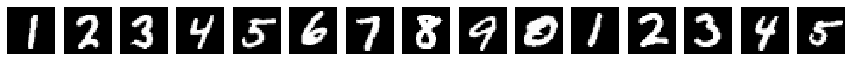

Inputs with Noise:


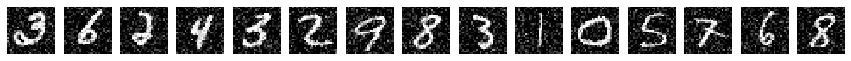

Reconstructions:


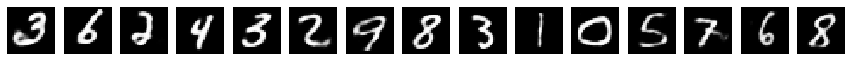

  Epoch 15/10000	 Loss: 0.00000135
EarlyStopping counter: 1 out of 7
Inputs:


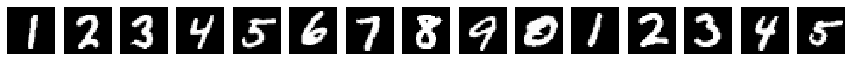

Inputs with Noise:


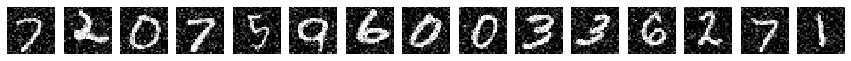

Reconstructions:


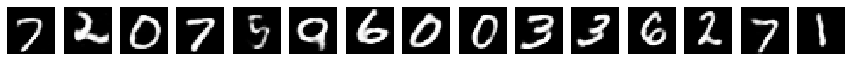

  Epoch 16/10000	 Loss: 0.00000135
Validation loss decreased (0.083667 --> 0.083506).  Saving model ...
Inputs:


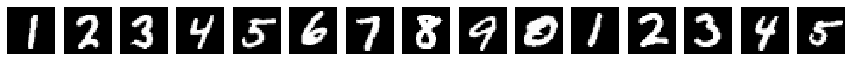

Inputs with Noise:


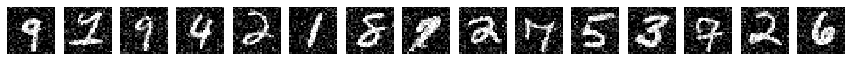

Reconstructions:


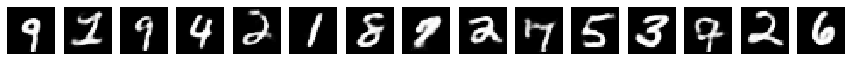

  Epoch 17/10000	 Loss: 0.00000135
Validation loss decreased (0.083506 --> 0.082645).  Saving model ...
Inputs:


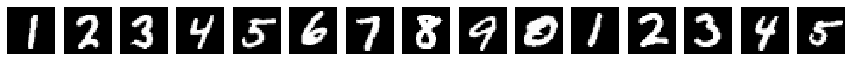

Inputs with Noise:


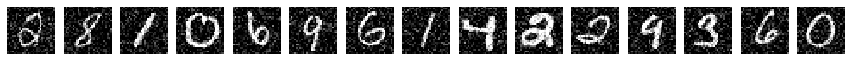

Reconstructions:


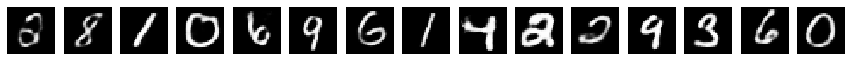

  Epoch 18/10000	 Loss: 0.00000135
EarlyStopping counter: 1 out of 7
Inputs:


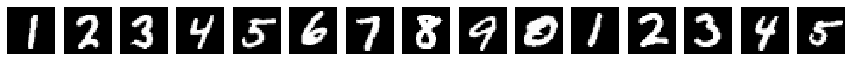

Inputs with Noise:


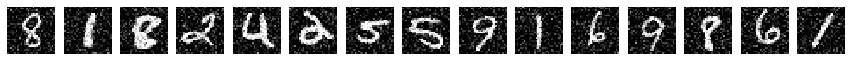

Reconstructions:


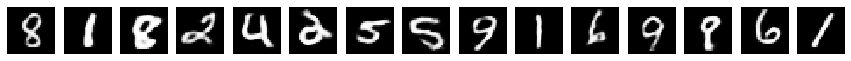

  Epoch 19/10000	 Loss: 0.00000134
EarlyStopping counter: 2 out of 7
Inputs:


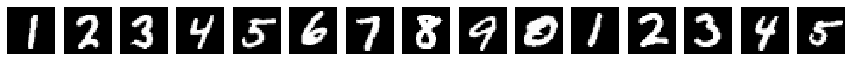

Inputs with Noise:


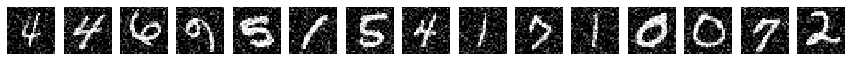

Reconstructions:


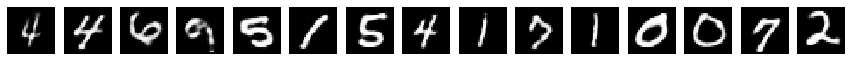

  Epoch 20/10000	 Loss: 0.00000134
EarlyStopping counter: 3 out of 7
Inputs:


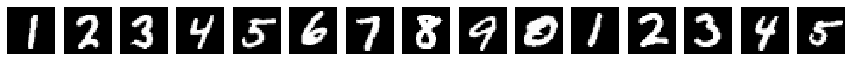

Inputs with Noise:


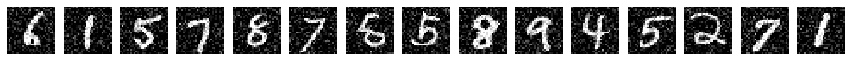

Reconstructions:


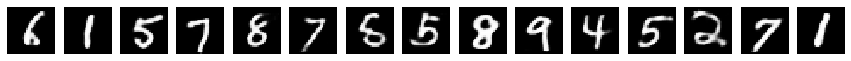

  Epoch 21/10000	 Loss: 0.00000134
EarlyStopping counter: 4 out of 7
Inputs:


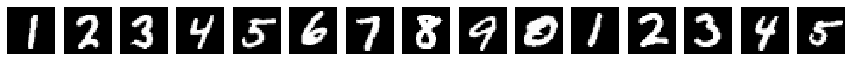

Inputs with Noise:


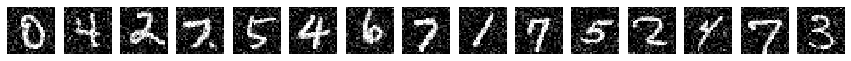

Reconstructions:


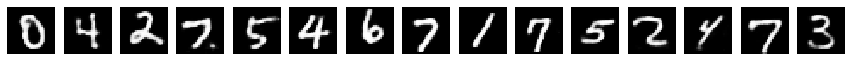

  Epoch 22/10000	 Loss: 0.00000134
EarlyStopping counter: 5 out of 7
Inputs:


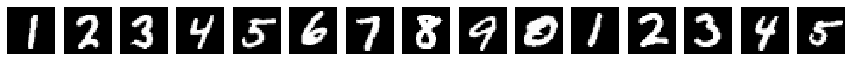

Inputs with Noise:


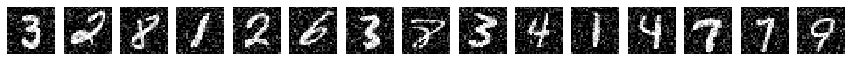

Reconstructions:


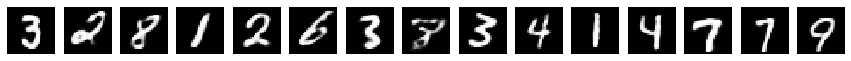

  Epoch 23/10000	 Loss: 0.00000134
EarlyStopping counter: 6 out of 7
Inputs:


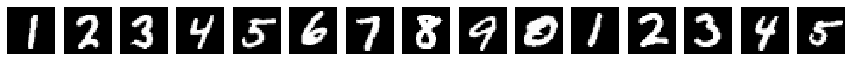

Inputs with Noise:


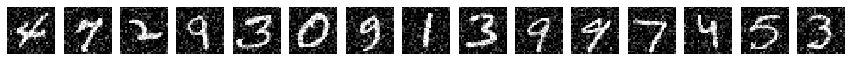

Reconstructions:


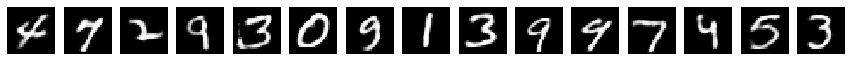

  Epoch 24/10000	 Loss: 0.00000134
EarlyStopping counter: 7 out of 7
Early stopping


In [33]:
# Train

def visualization(input_img, inputs_img_with_noise, recons_img):
    if input_img.shape[0] > 15:
        n = 15
    else:
        n = input_img.shape[0]
        
    print("Inputs:")
    show(input_img[0:n].view((1,-1,28,28))[0])
    
    print("Inputs with Noise:")
    show(inputs_img_with_noise[0:n].view((1,-1,28,28))[0])
    
    print("Reconstructions:")
    show(recons_img[0:n].view((1,-1,28,28))[0].detach().numpy()) 



def show(image_batch, rows=1):
    # Set Plot dimensions
    cols = np.ceil(image_batch.shape[0] / rows)
    plt.rcParams['figure.figsize'] = (0.0 + cols, 0.0 + rows) # set default size of plots
    
    for i in range(image_batch.shape[0]):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(image_batch[i], cmap="gray", vmin=0, vmax=1)
        plt.axis('off')
    plt.show()

early_stopping = EarlyStopping(patience=7, verbose=True)
train_losses = []
valid_losses = []
avg_train_losses = []
avg_valid_losses = [] 
for epoch in range(1, N_EPOCH + 1):
    dae.train()

    train_loss = 0.0
    for (data, cond) in train_loader:
        inputs = data.to(device)
        inputs = inputs.view(inputs.size(0), -1)
        
        # add noise to inputs
        inputs_with_noise = add_noise(inputs)
        outputs = dae(inputs_with_noise)
        loss=criterion(outputs,inputs)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        train_losses.append(loss.item())

    for (data, target) in test_loader:
        inputs = data.to(device)
        inputs = inputs.view(inputs.size(0), -1)
        output = dae(inputs)
        loss = criterion(output, inputs)
        valid_losses.append(loss.item())

    train_loss = np.average(train_losses)
    valid_loss = np.average(valid_losses)
    avg_train_losses.append(train_loss)
    avg_valid_losses.append(valid_loss)
        
    epoch_len = len(str(N_EPOCH))
        
    train_losses = []
    valid_losses = []
        
    early_stopping(valid_loss, dae)
        
    if early_stopping.early_stop:
        print("Early stopping")
        break

    
    
    # Visualization
    visualization(inputs, inputs_with_noise,  outputs)
    print ('  Epoch {}/{}\t Loss: {:.8f}'
                .format(epoch, N_EPOCH, train_loss / len(train_loader.dataset)))

    

    